## Project 4: Ensemble Techniques
### Objective:
##### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
### Dataset:
##### bank-full.csv
### Attribute information:

###### Categorical Variables:
* Marital - (Married , Single , Divorced)",
* Job -     
  (Management,BlueCollar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
* Contact - (Telephone,Cellular,Unknown)
* Education - (Primary,Secondary,Tertiary,Unknown)
* Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
* Poutcome - (Success,Failure,Other,Unknown)
* Housing - (Yes/No)
* Loan - (Yes/No)
* deposit - (Yes/No)
* Default - (Yes/No)

###### Numerical Variables:
* Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

from sklearn import metrics
from sklearn import preprocessing

# calculate accuracy measures and confusion matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


In [3]:
df = pd.read_csv("C:\\Users\\exsxaxr\\Data Analytics\\bank-full.csv")

In [4]:
df.shape

(45211, 17)

In [5]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Outliers
 Lets check for outliers in the numerical category using 5 point summary

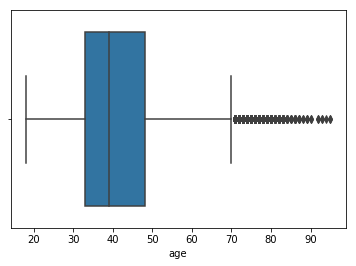

In [7]:
# Age:
sns.boxplot(x='age', data=df)

   * Average age of the people in the dataset is 41
   * Min. age is 18
   * Max. age is 95
   * 75 percentage of the people have 49 or less  age.
   * As 95 is max, there is great chance that its a outlier.

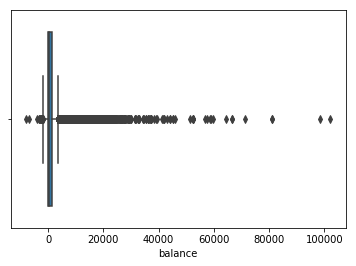

In [8]:
# Balance:
sns.boxplot(x='balance', data=df)

* Average balance of the people in the dataset is (approx)1528.53
* Min. balance is -6847
* Max. balance is 81204
* 75 percentage of the people have 1708 or less balance.
* 81204 which is the maximum value, is very huge and its a outlier data point.

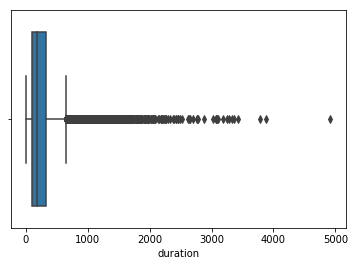

In [9]:
#Duration:

sns.boxplot(x='duration', data=df)

* Average duration of the people speaking in the dataset is (approx)371 
* Min. duration is 2
* Max. duration is 3881
* 75 percentage of the people spoke for 496 seconds or less
* 3881, the maximum value is an outlier data point

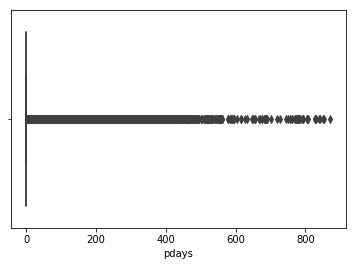

In [10]:
# Pdays:

sns.boxplot(x='pdays', data=df)

* Average no. of days passed after the client was contacted from previous campaign in the dataset is (approx)51.33
* Min. pdays is -1 (Assuming
* Max. pdays is 854
* For 75% of records it is 20.75 days, which means the Client was frequently contacted.
* Thus there is a huge outlier in this dataset.

In [11]:
# There are so many object type attributes which we have to convert to numeric.
df_new = pd.get_dummies(df, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])
#Convert the target column to binary
df_new.Target.replace(('yes', 'no'), (1, 0), inplace=True)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int64
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_div

In [13]:
# We can see that it is successfully converted to integer datatypes.

In [14]:
df_new.shape

(45211, 52)

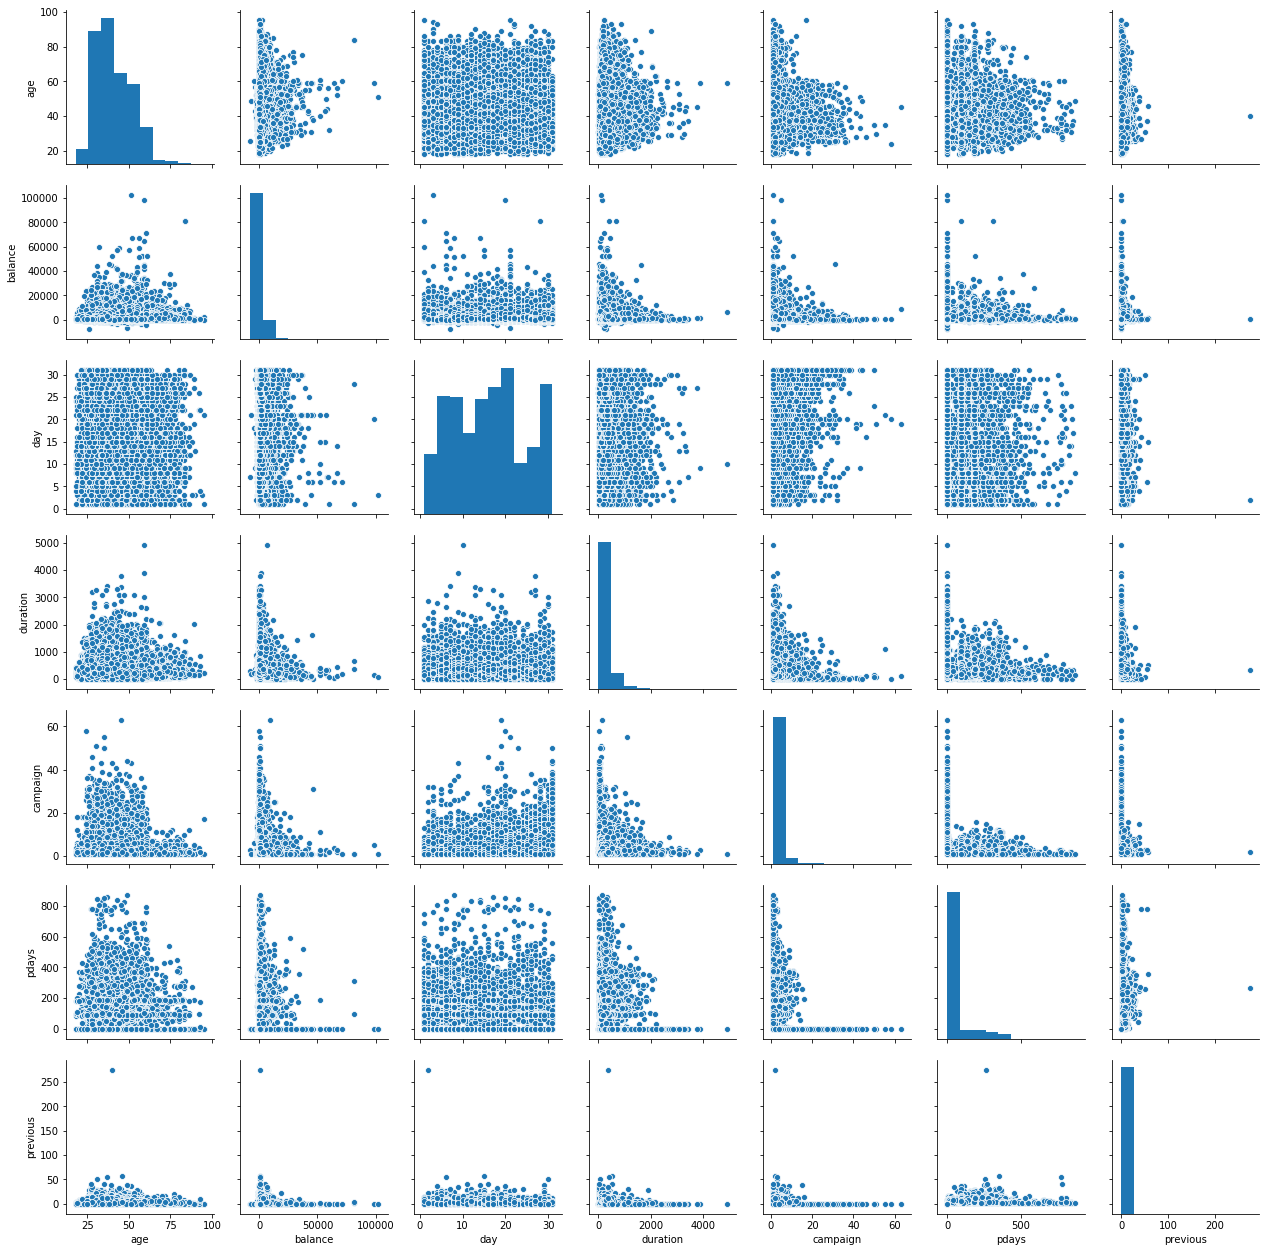

In [15]:
sns.pairplot(df)

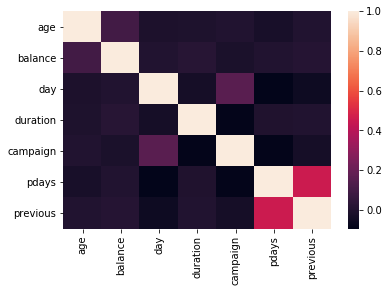

In [16]:
sns.heatmap(df.corr())

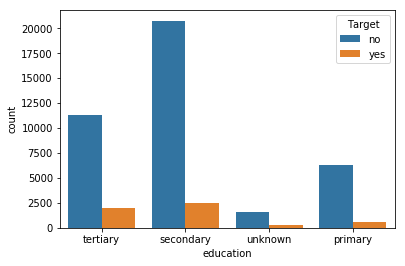

In [17]:
sns.countplot(x='education',data=df,hue='Target')

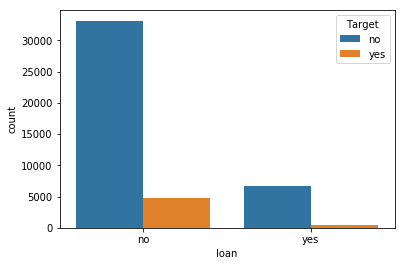

In [18]:
sns.countplot(x='loan',data=df,hue='Target')

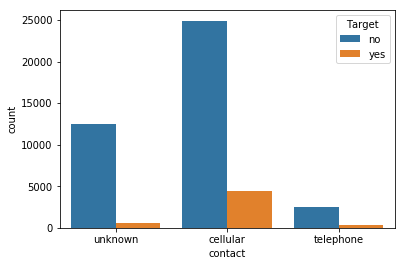

In [19]:
sns.countplot(x='contact',data=df,hue='Target')

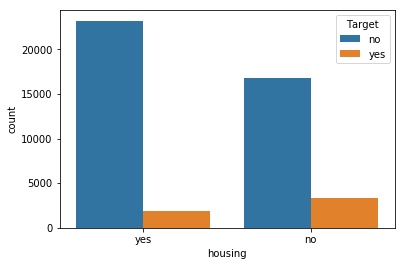

In [20]:
sns.countplot(x='housing',data=df,hue='Target')

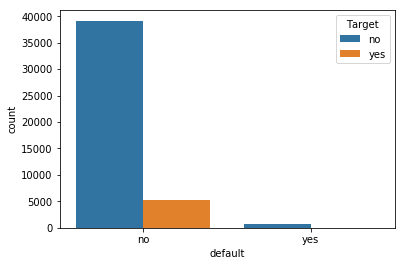

In [21]:
sns.countplot(x='default',data=df,hue='Target')

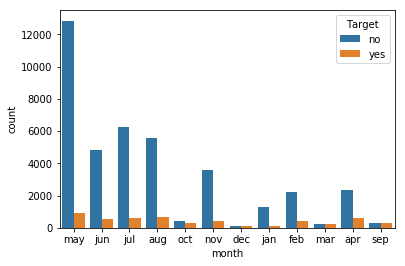

In [22]:
sns.countplot(x='month',data=df,hue='Target')

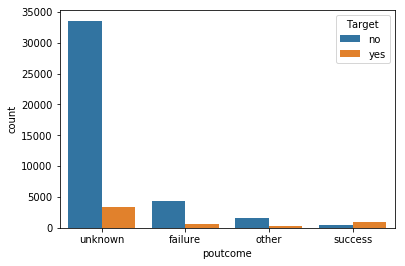

In [23]:
sns.countplot(x='poutcome',data=df,hue='Target')

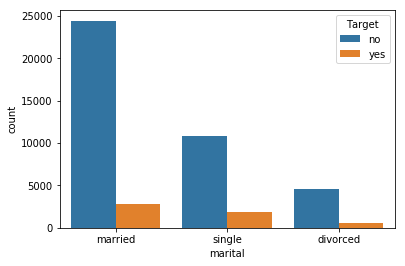

In [24]:
sns.countplot(x='marital',data=df,hue='Target')

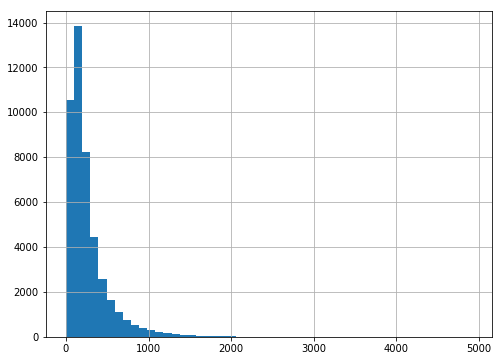

In [27]:
df['duration'].hist(bins=50)

## Model Building

In [28]:
# Store all the independent attributes into variable X
# Store the target column (Personal Loan) into variable y
X = df_new.drop("Target" , axis=1)
y = df_new["Target"]   # select all rows and the 17 th column which is the classification "Yes", "No"
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

###### Logistic Model

In [29]:
y_train = np.ravel(y_train)
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
model_log_score = model_log.score(X_test, y_test)
predict_log = model_log.predict(X_test)
print("Accuracy = ", model_log_score)
print("\nConfusion Matrix: \n", metrics.confusion_matrix(y_test, predict_log))
print("\nSummary: \n", metrics.classification_report(y_test, predict_log))

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy =  0.9059274550280153

Confusion Matrix: 
 [[11728   302]
 [  974   560]]

Summary: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     12030
           1       0.65      0.37      0.47      1534

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.91      0.89     13564



In [30]:
#Accuracy is 90.5% but can be dominated by the larger class.

##### Naive Bayes Model

In [31]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
model_NB_score = model_NB.score(X_test, y_test)
predictions=model_NB.predict(X_test)
print("Accuracy = ", model_NB_score)
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,predictions))
print("\nSummary : \n", metrics.classification_report(y_test, predictions))

Accuracy =  0.8551312297257446

Confusion Matrix:
 [[10719  1311]
 [  654   880]]

Summary : 
               precision    recall  f1-score   support

           0       0.94      0.89      0.92     12030
           1       0.40      0.57      0.47      1534

   micro avg       0.86      0.86      0.86     13564
   macro avg       0.67      0.73      0.69     13564
weighted avg       0.88      0.86      0.87     13564



In [32]:
#The accuracy score of Naive Bayes model is only 85.5%

###### K Nearest Neighbours

In [33]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [34]:
predicted = NNH.predict(X_test)
NNH_score = NNH.score(X_test, y_test)
print("Accuracy = ", NNH_score)
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,predicted))
print("\nSummary : \n", metrics.classification_report(y_test, predicted))

Accuracy =  0.8745207903273371

Confusion Matrix:
 [[11403   627]
 [ 1075   459]]

Summary : 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     12030
           1       0.42      0.30      0.35      1534

   micro avg       0.87      0.87      0.87     13564
   macro avg       0.67      0.62      0.64     13564
weighted avg       0.86      0.87      0.86     13564



### Ensembe Techniques

##### Decision Tree

In [35]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
y_pred = dt_model.predict(X_test)
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test , y_test))

1.0
0.8762901798879387


In [37]:
# The difference in scores from test and training set shows that the model is an overfit

In [38]:
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred))


Confusion Matrix:
 [[11154   876]
 [  802   732]]


In [39]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12030
           1       0.46      0.48      0.47      1534

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.69      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564



In [40]:
# precision and recall for class 1  is poor as the sample size is small for that class.

##### Random Forest

In [41]:
rfcl = RandomForestClassifier(random_state=1)

In [42]:
enclf = VotingClassifier(estimators = [('rf', rfcl)], voting = 'hard')

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

y_pred = rfcl.predict(X_test)

print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test , y_test))


0.9998420071412772
0.9049690356826895


In [44]:
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred))


Confusion Matrix:
 [[11664   366]
 [  923   611]]


In [45]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12030
           1       0.63      0.40      0.49      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.68      0.72     13564
weighted avg       0.89      0.90      0.90     13564



In [46]:
# Random forest has increased the precision value for larger calss but still for smaller class it is low.

###### Gradient Boosting

In [47]:
abcl = AdaBoostClassifier(n_estimators=50)

abcl = abcl.fit(X_train, y_train)

y_pred = abcl.predict(X_test)

print(abcl.score(X_train, y_train))
print(abcl.score(X_test , y_test))


0.8999905204284766
0.9029047478619876


In [48]:
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred))


Confusion Matrix:
 [[11646   384]
 [  933   601]]


In [49]:
print(metrics.classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12030
           1       0.61      0.39      0.48      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.12, max_depth=5)
gbcl = gbcl.fit(X_train, y_train)

In [51]:
y_pred = gbcl.predict(X_test)

print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test , y_test))

0.9223939077953677
0.908950162194043


In [52]:
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred))


Confusion Matrix:
 [[11656   374]
 [  861   673]]


In [53]:
print(metrics.classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12030
           1       0.64      0.44      0.52      1534

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.79      0.70      0.74     13564
weighted avg       0.90      0.91      0.90     13564



In [54]:
# Gradient boosting has given the best result.

# Lets try SVC

###### SVC

In [ ]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 1, kernel='rbf', gamma= 1)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

In [ ]:
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred))

###### Summary:

Without oversampling and parameter optimization, all algorithms show around 90% accuracy overall.

Gradient boosting has given the best result.  